In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
sns.set_style('white')

In [3]:
def get_sample_trends(data, pattern_column='pattern', n_trends=10):
    """Get a sample of weekly trends from turnip selling price data
    
    Args:
        data (dataframe): weekly turnip selling price data
        pattern_column (str): column containing trend patterns from 0 to 3
        n_trends (int): number of trends per pattern
    
    Returns:
        sample_trends (dataframe):
            sample of (4 * n_trends) weekly selling price trends
    """
    
    sample_trends = [
        data.loc[data[pattern_column] == pattern].sample(n_trends) 
        for pattern in range(0, 4)
    ]

    sample_trends = pd.concat(sample_trends)
    sample_trends.reset_index(drop=True, inplace=True)
    return sample_trends

In [4]:
data = pd.read_csv('data/generated_data.csv')

In [5]:
buy_data = data.iloc[:, 0:4]
sell_data = data.drop(columns=['base_price'])

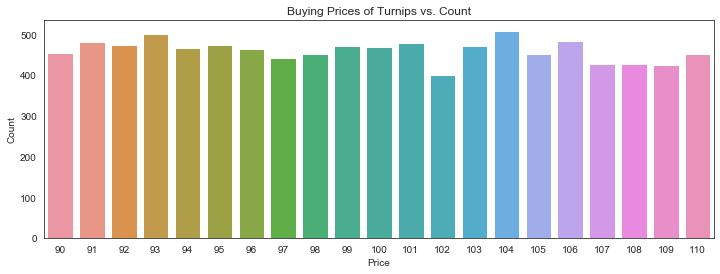

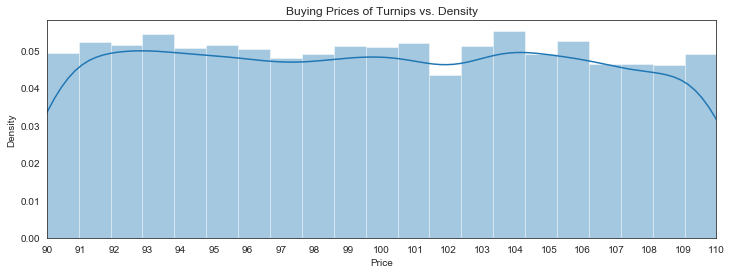

count    9668.000000
mean       99.868329
std         6.035098
min        90.000000
25%        95.000000
50%       100.000000
75%       105.000000
max       110.000000
Name: base_price, dtype: float64

In [6]:
buying_prices = buy_data['base_price']

plt.figure(figsize=(12, 4))
buying_price_countplot = sns.countplot(buying_prices)
buying_price_countplot.set(
    title='Buying Prices of Turnips vs. Count',
    xlabel='Price',
    ylabel='Count'
)
plt.show()

plt.figure(figsize=(12, 4))
buying_price_distplot = sns.distplot(buying_prices, bins=21)
buying_price_distplot.set(
    title='Buying Prices of Turnips vs. Density',
    xlabel='Price',
    ylabel='Density'
)
plt.xlim((90, 110))
plt.xticks(range(90, 111))
plt.show()

buying_prices.describe()

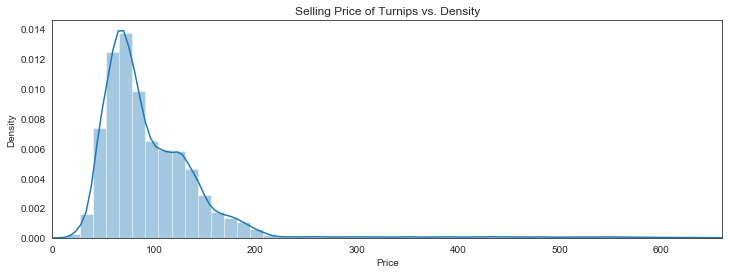

count    116016.000000
mean         97.670632
std          60.833684
min          14.000000
25%          63.000000
50%          82.000000
75%         118.000000
max         660.000000
dtype: float64

In [7]:
selling_prices = sell_data.iloc[:, 3:].unstack()

plt.figure(figsize=(12, 4))
selling_price_distplot = sns.distplot(selling_prices)
selling_price_distplot.set(
    title='Selling Price of Turnips vs. Density',
    xlabel='Price',
    ylabel='Density'
)
plt.xlim((0, 660))
plt.show()

selling_prices.describe()

In [8]:
sample_trends = get_sample_trends(sell_data)
sample_trends = pd.melt(
    sample_trends, 
    id_vars=['seed', 'pattern'], 
    value_vars=sample_trends.columns[3:],
    var_name='time',
    value_name='price'
)

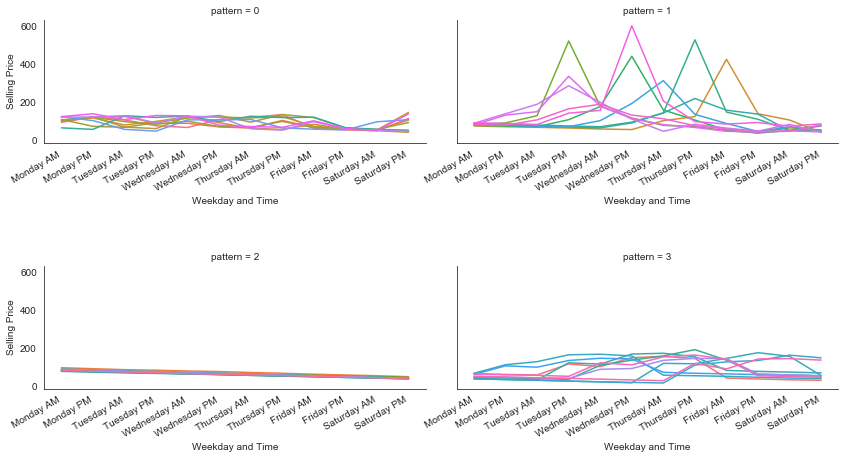

In [9]:
trend_grid = sns.FacetGrid(
    sample_trends, 
    col='pattern', 
    col_wrap=2, 
    aspect=2, 
    sharex=False, 
    hue='seed'
)
trend_grid = trend_grid.map(sns.lineplot, 'time', 'price', sort=False)
trend_grid.set(xlabel='Weekday and Time', ylabel='Selling Price')

for ax in trend_grid.axes.flat:
    labels = ax.get_xticklabels() # get x labels
    ax.set_xticklabels(labels, rotation=30, ha='right') # set new labels
    
plt.subplots_adjust(hspace=1)
plt.show()